In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('./data/Country-data.csv')

In [3]:
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
dataset.describe()[1:].T.style.background_gradient(cmap='Blues', axis=1)

,mean,std,min,25%,50%,75%,max
child_mort,38.270060,40.328931,2.600000,8.250000,19.300000,62.100000,208.000000
exports,41.108976,27.412010,0.109000,23.800000,35.000000,51.350000,200.000000
health,6.815689,2.746837,1.810000,4.920000,6.320000,8.600000,17.900000
imports,46.890215,24.209589,0.065900,30.200000,43.300000,58.750000,174.000000
income,17144.688623,19278.067698,609.000000,3355.000000,9960.000000,22800.000000,125000.000000
inflation,7.781832,10.570704,-4.210000,1.810000,5.390000,10.750000,104.000000
life_expec,70.555689,8.893172,32.100000,65.300000,73.100000,76.800000,82.800000
total_fer,2.947964,1.513848,1.150000,1.795000,2.410000,3.880000,7.490000
gdpp,12964.155689,18328.704809,231.000000,1330.000000,4660.000000,14050.000000,105000.000000


In [7]:
# unique values
dataset.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [8]:
print("the number of duplicate records are :", len(dataset[dataset.duplicated()]))
dataset[dataset.duplicated()] # checking duplicates

the number of duplicate records are : 0


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [19]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
numerical_features = [ feature for feature in dataset.columns if feature not in categorical_features]

print("The numerical features are :",numerical_features)
print("The caterogical features are :",categorical_features)

The numerical features are : ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
The caterogical features are : ['country']


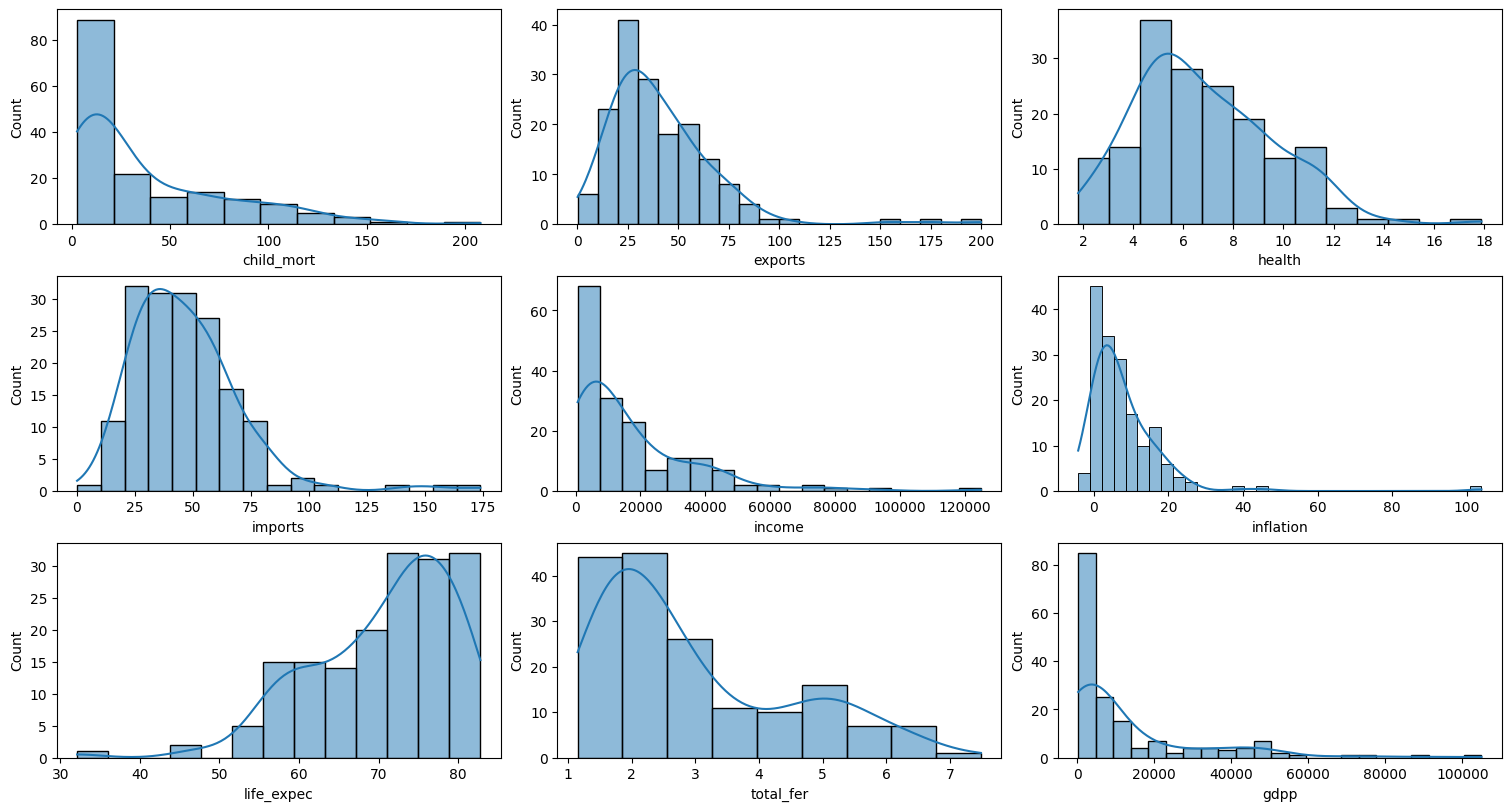

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8), constrained_layout=True)

ax = ax.flatten()

int_coloumns = dataset.select_dtypes(exclude='object').columns
for i, feature in enumerate(int_coloumns):
    sns.histplot(data=dataset[feature], ax=ax[i], kde=True)

C:\Users\pavan\AppData\Local\Temp\ipykernel_20056\344453544.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\pavan\AppData\Local\Temp\ipykernel_20056\344453544.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\pavan\AppData\Local\Temp\ipykernel_20056\344453544.py:5: UserWarning:



`distplot` is a 

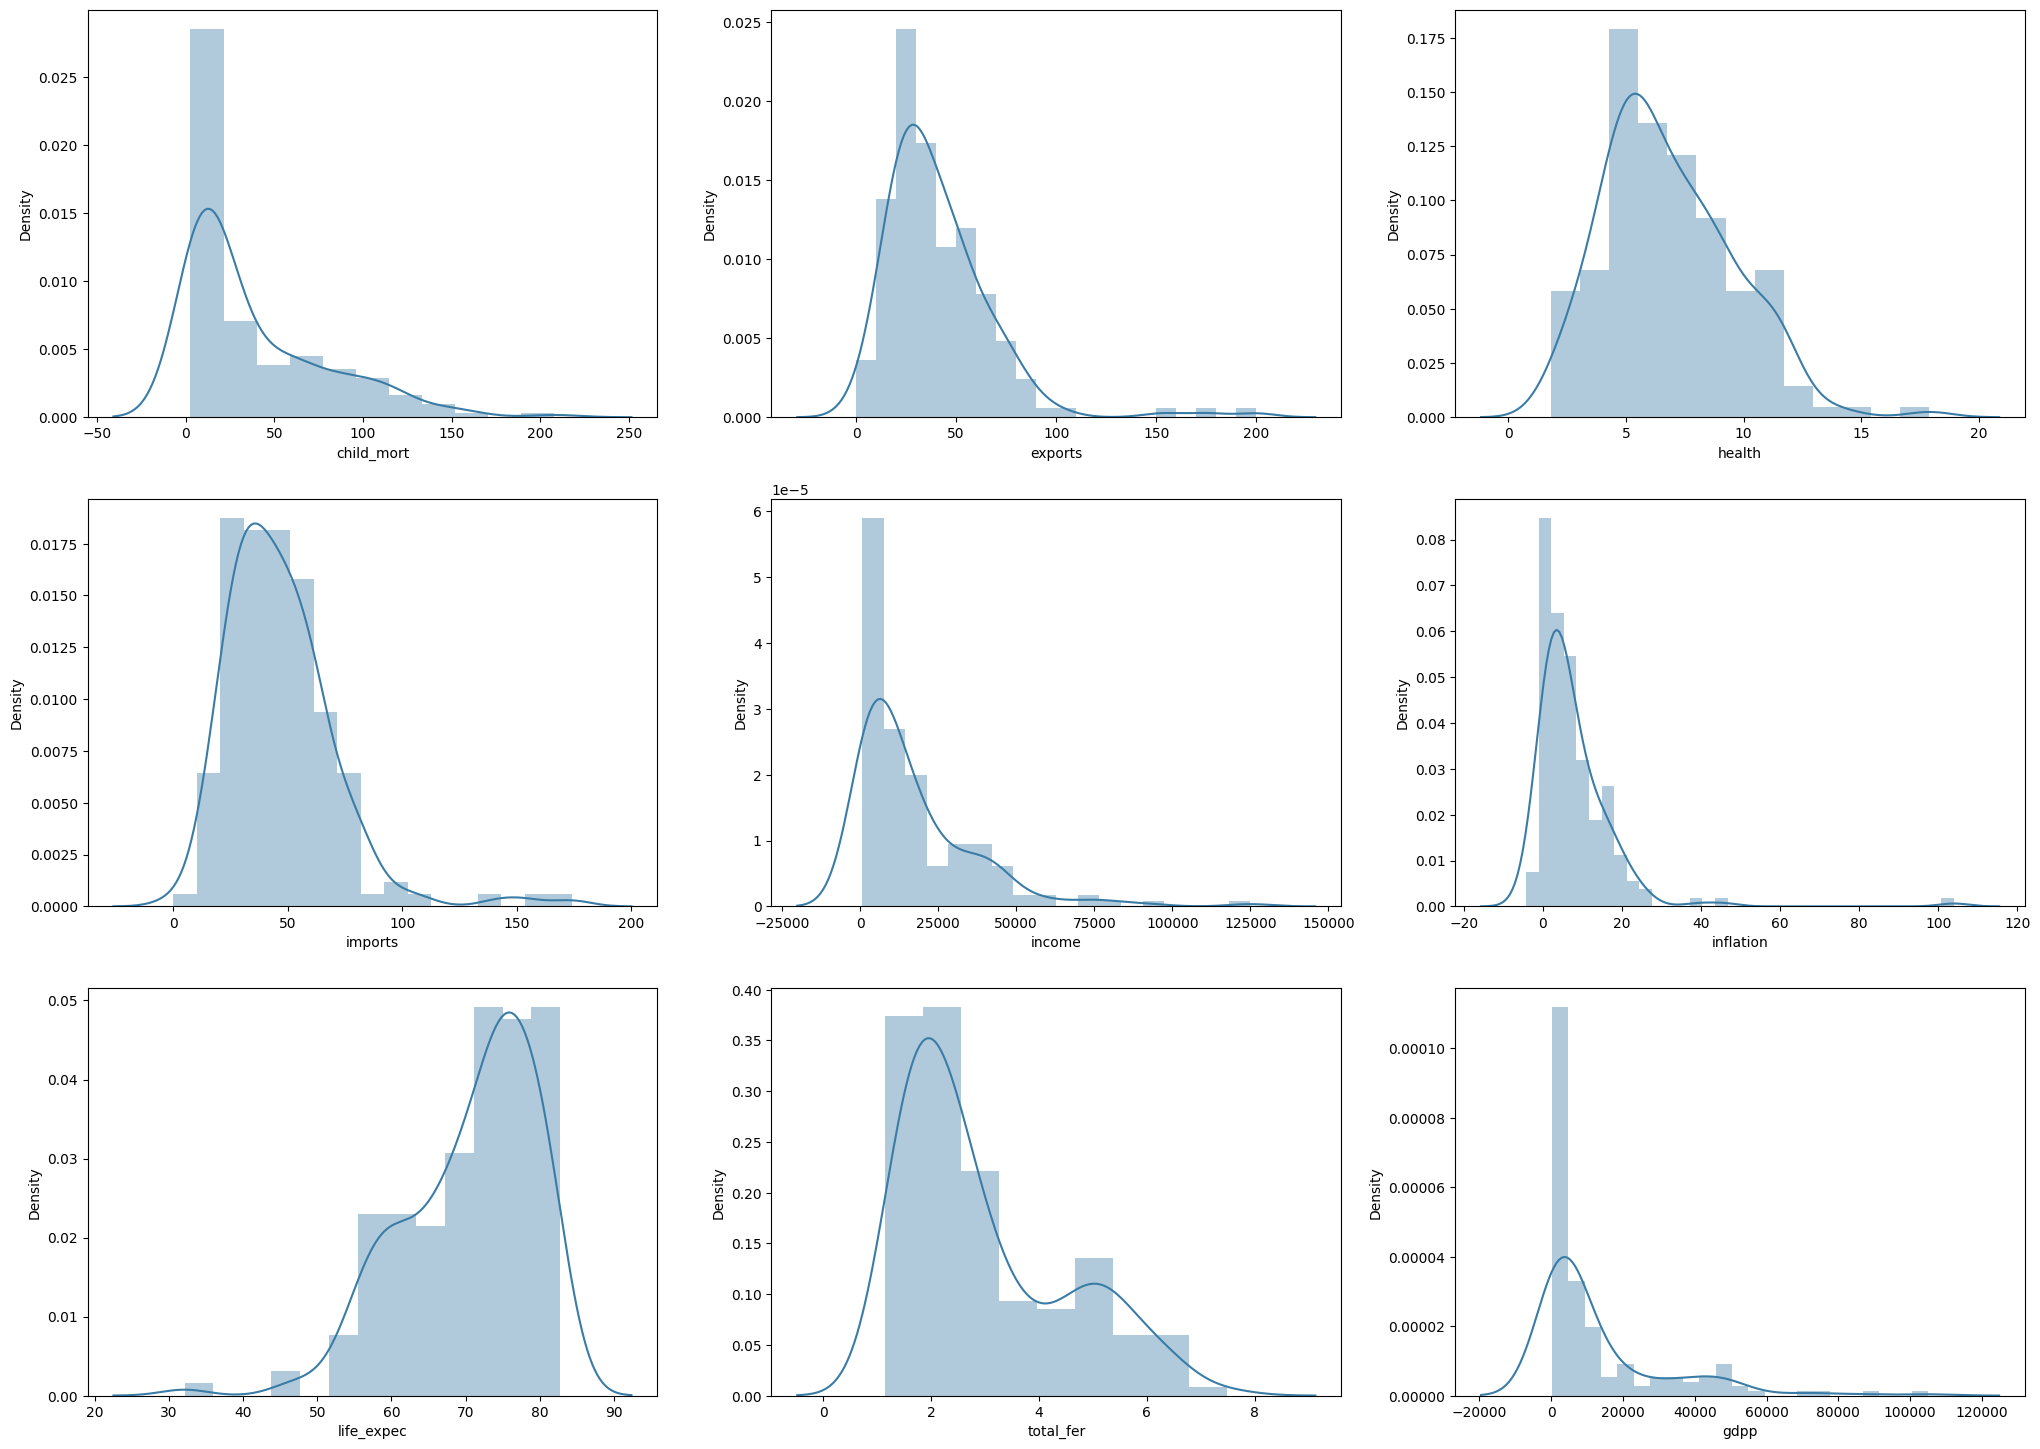

In [24]:
fig=plt.figure(figsize=(25,18))
df1 = dataset.drop('country', axis=1)
for i,col in enumerate(numerical_features):
    ax=fig.add_subplot(3,3,i+1)
    ax1=sns.distplot(df1[df1.columns[i]] ,kde=True,color='#3a7ca5')

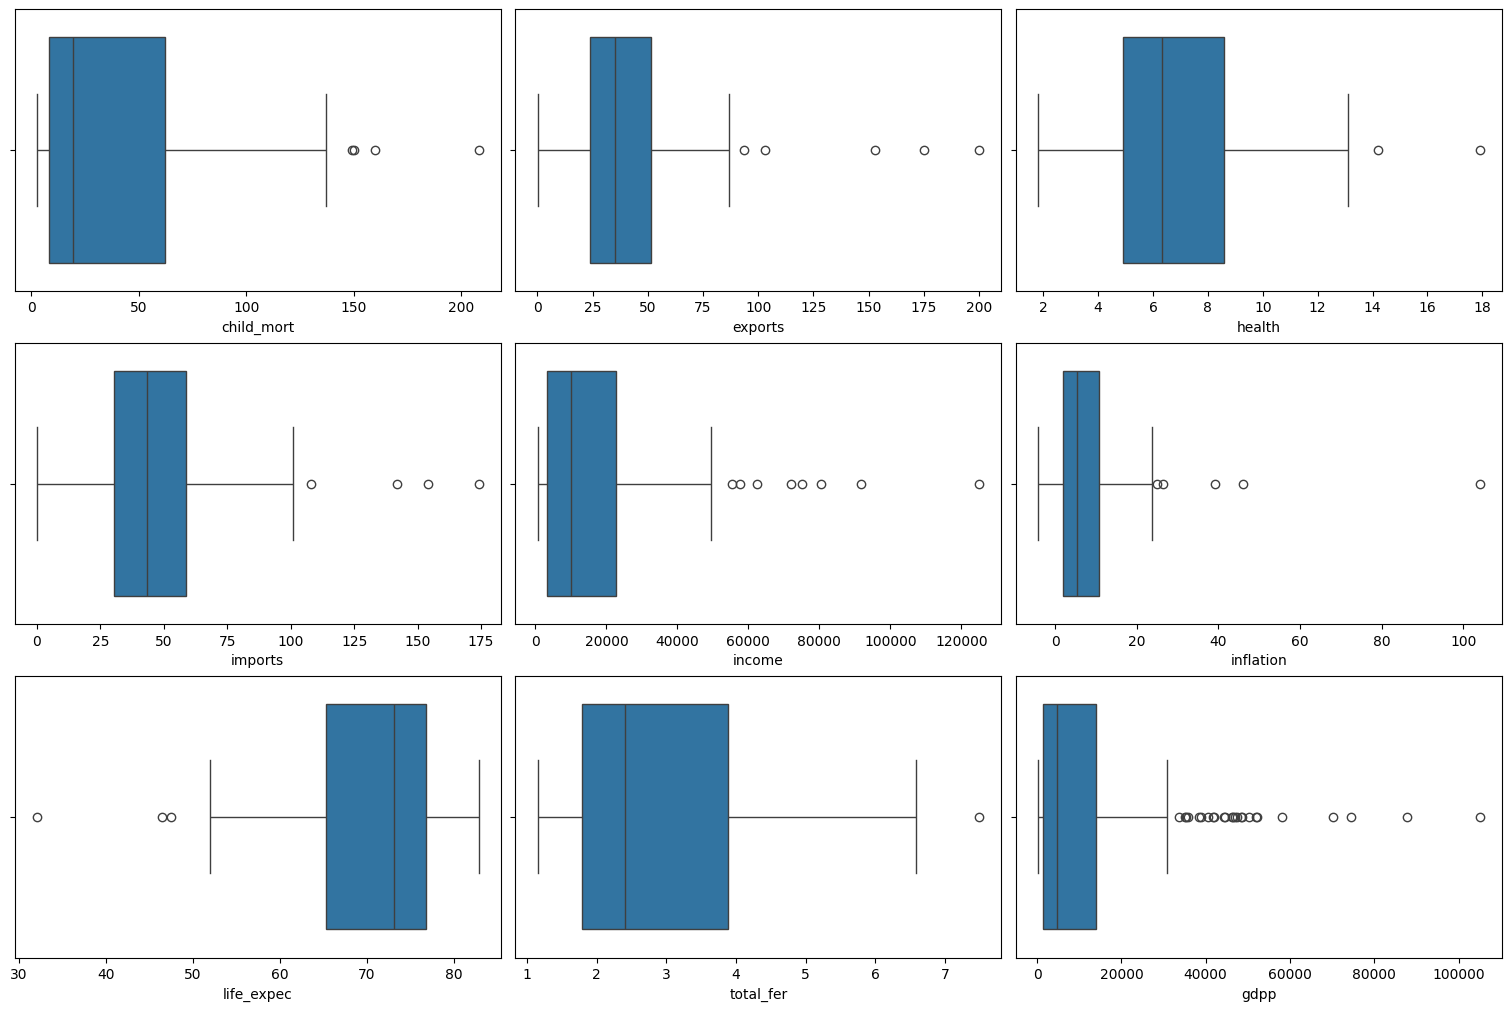

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10), constrained_layout=True)

ax = ax.flatten()

for i, feature in enumerate(int_coloumns):
    sns.boxplot(x=dataset[feature], ax=ax[i])

<Axes: >

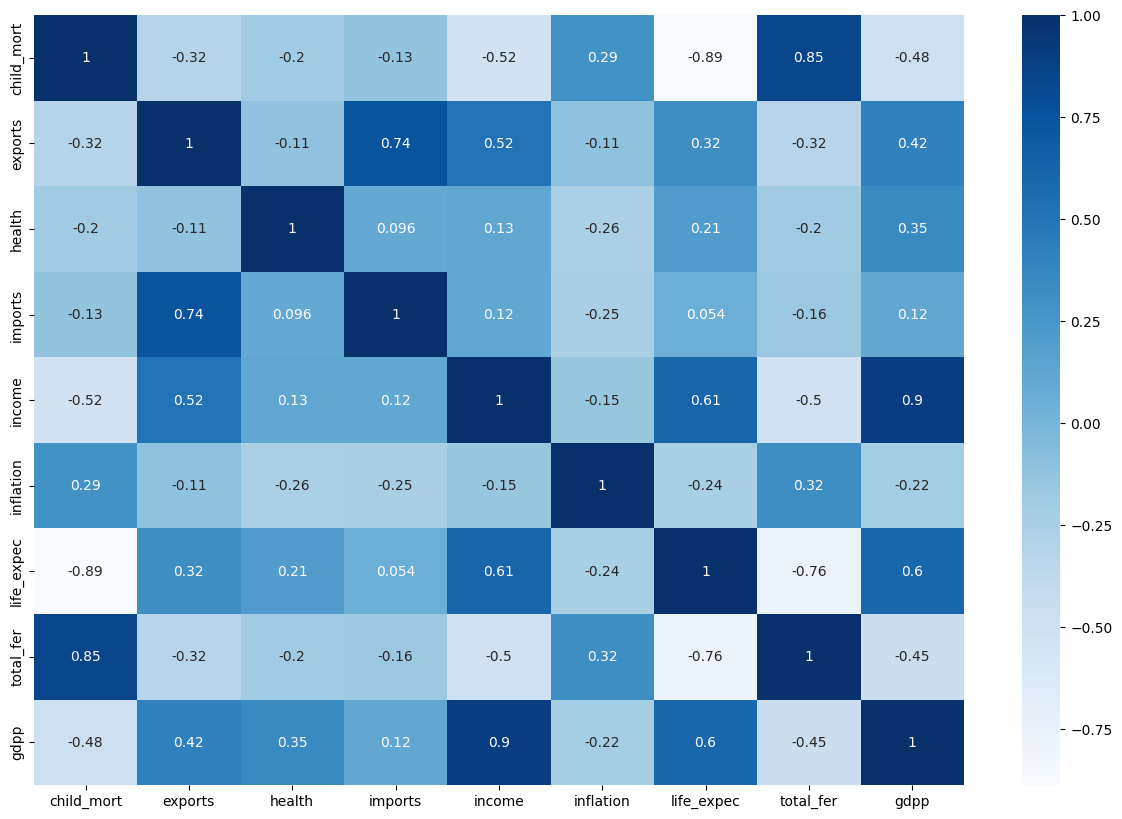

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset[numerical_features].corr(),annot=True,cmap='Blues')

In [17]:
import plotly.express as px

df1 = dataset.drop('country', axis=1)

z = df1.corr()
fig = px.imshow(z, text_auto=True, aspect="auto",color_continuous_scale='Blues')
fig.show()

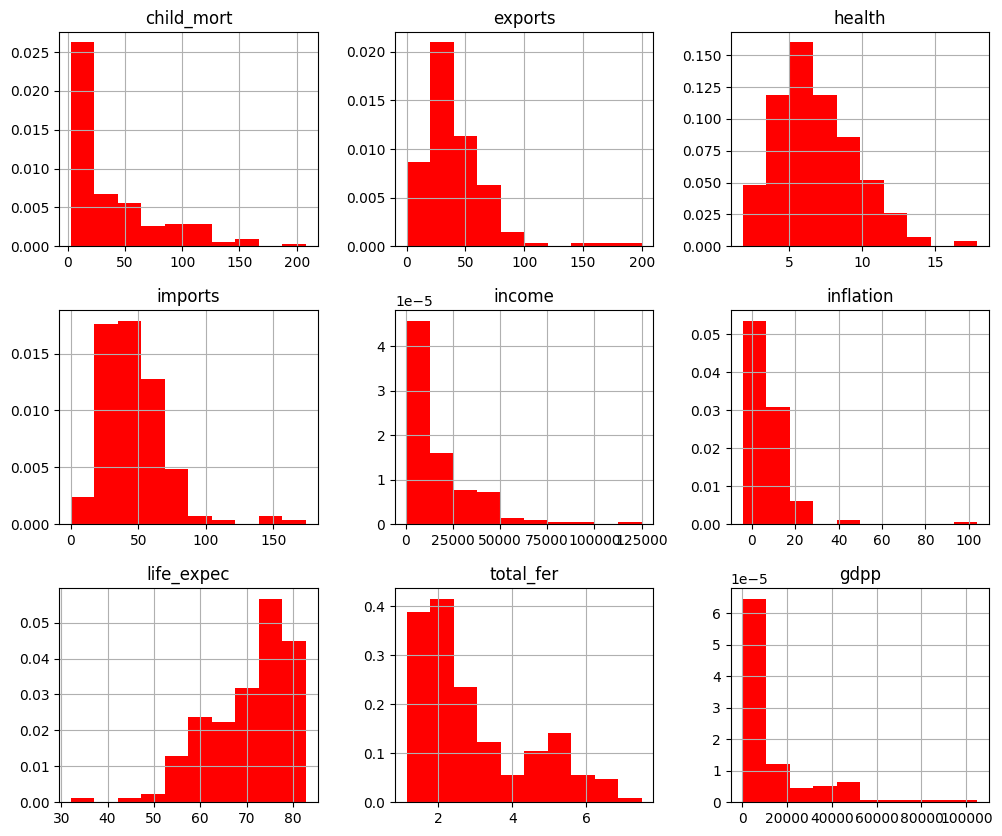

In [43]:
dataset.hist(figsize=(12,10), density=True, color='red')
plt.show()

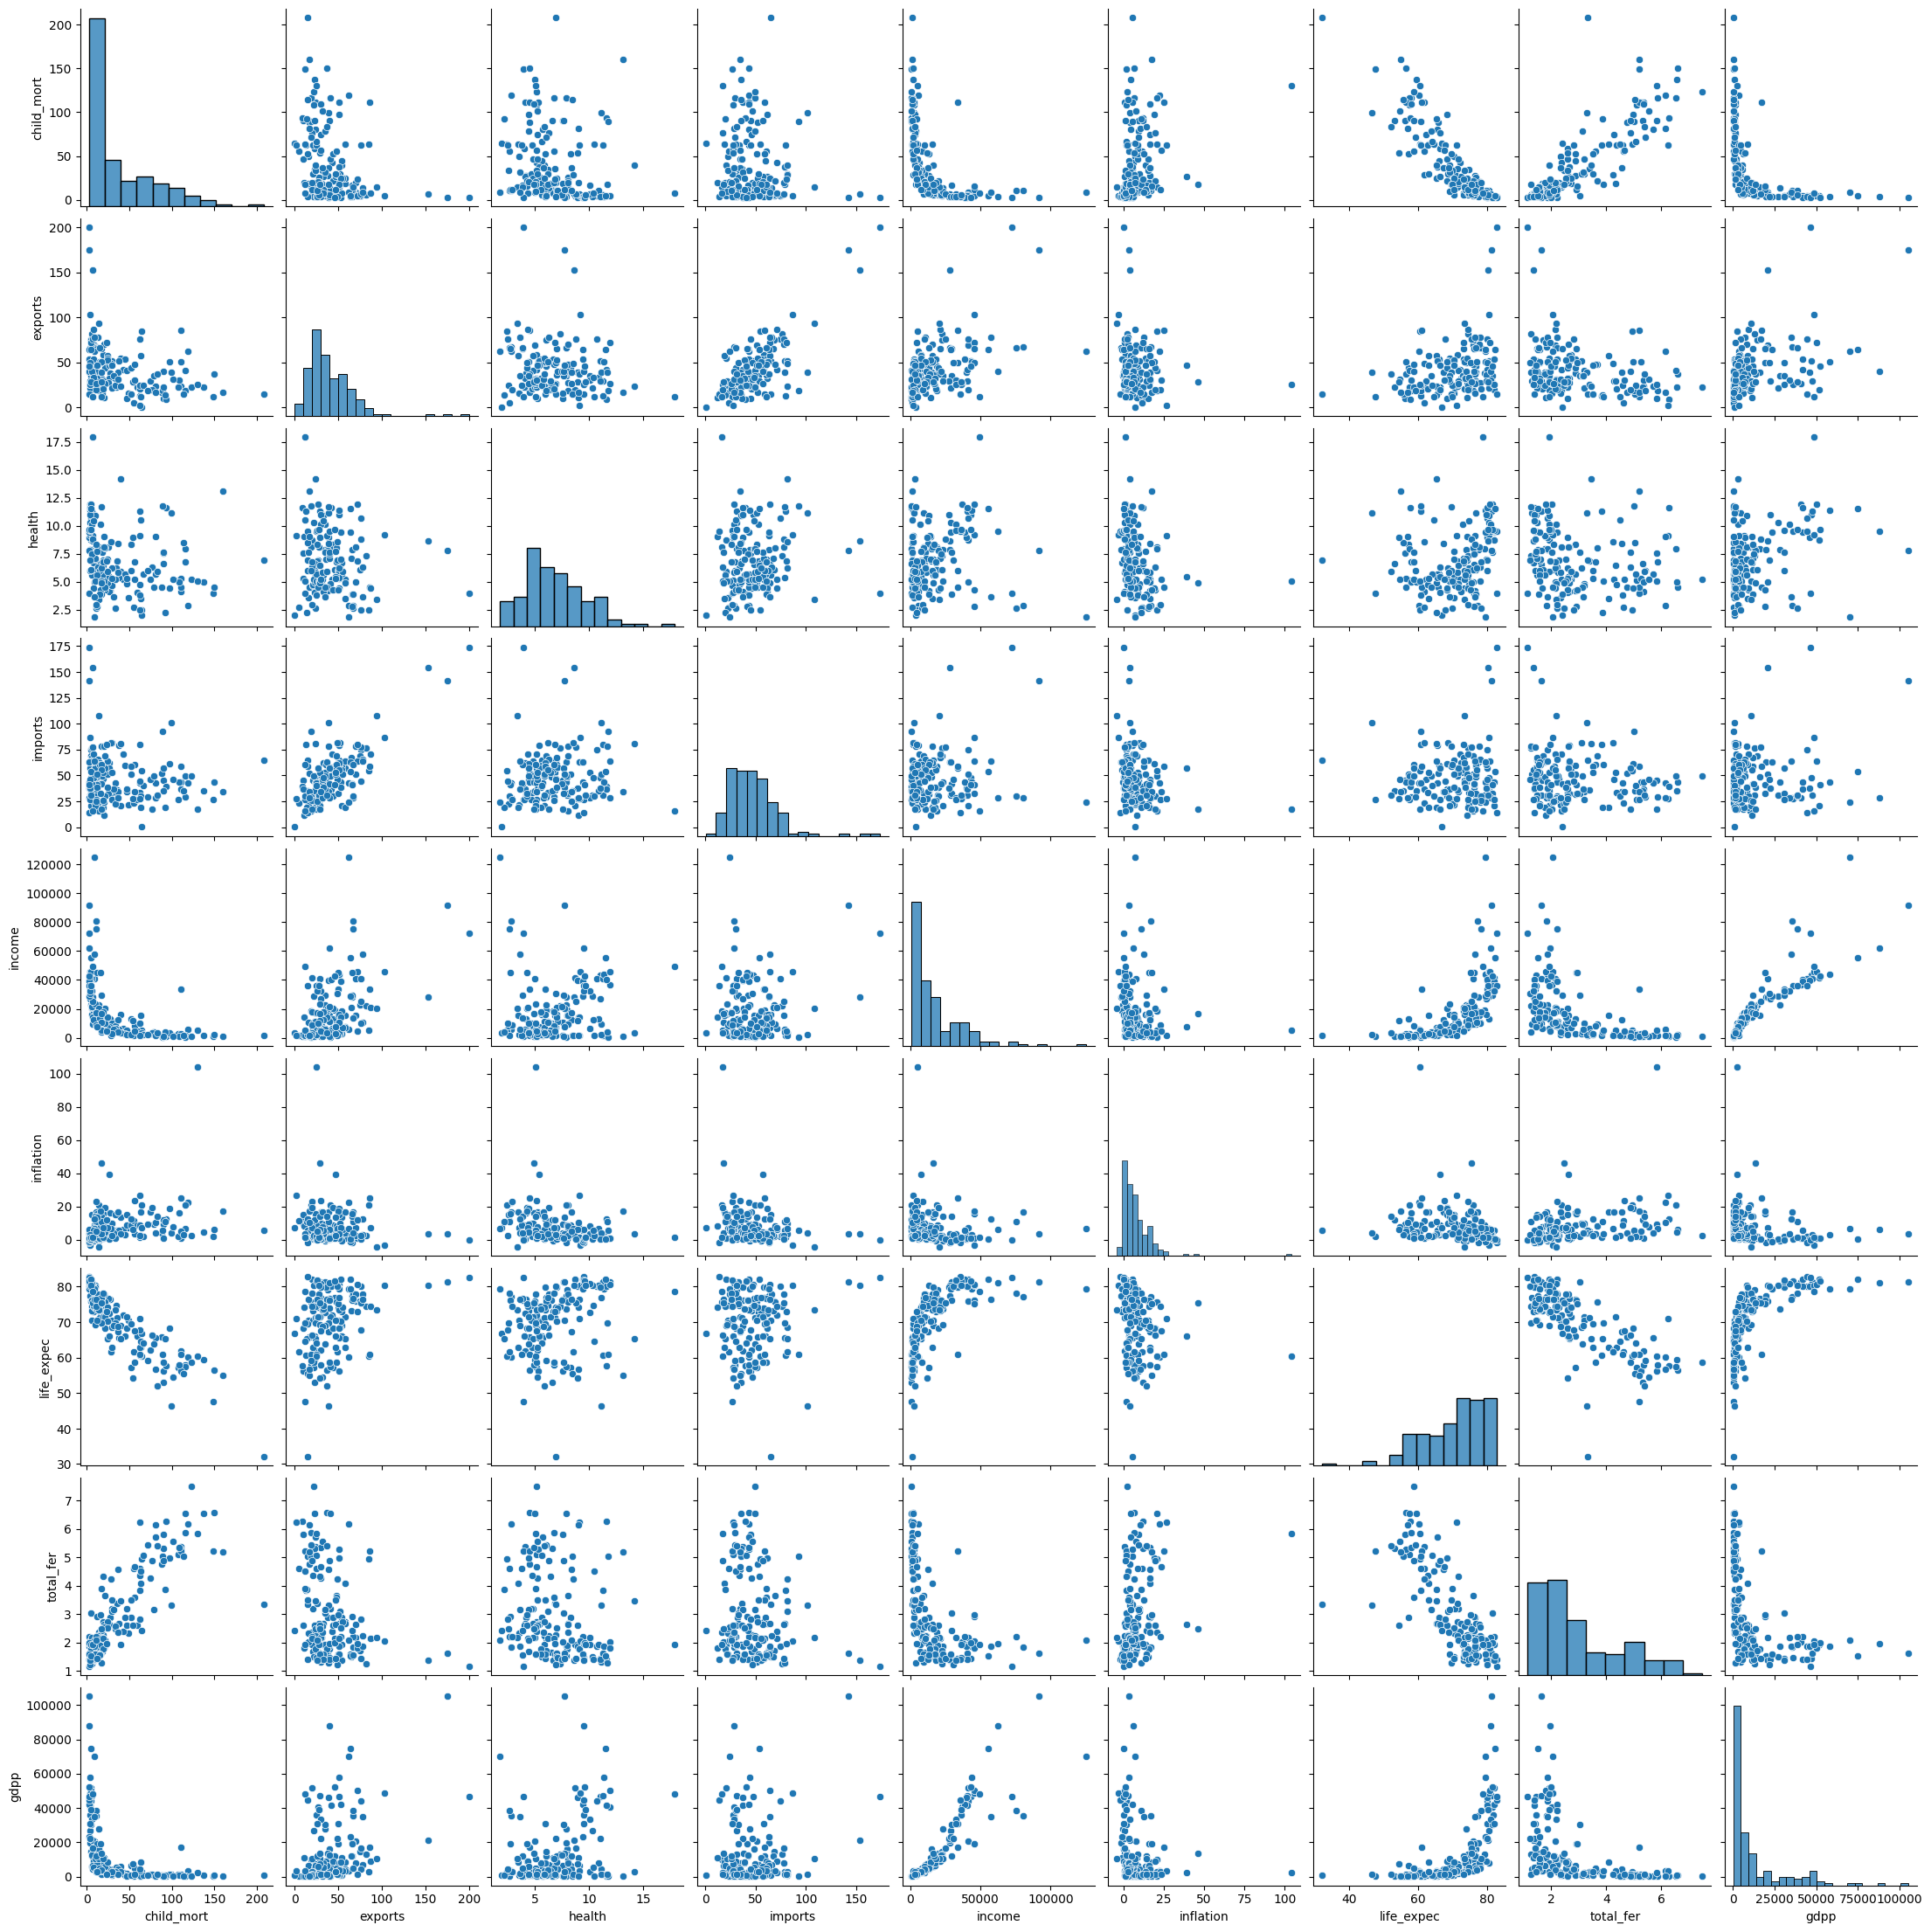

In [44]:
sns.pairplot(dataset)